# Cofee Shop Sales Analisys

## Introducere

Acest set de date este ideal pentru a explora tendintele de vanzari in evolutie de-a lungul timpului, pentru a identifica zilele de varf de trafic al clientilor si pentru a explora valorile de performanta ale diferitelor produse. Setul de date cuprinde inregistrari tranzactionale de la Maven Roasters, o cafenea fictiva din New York care opereaza in trei locatii distincte. Acesta cuprinde detalii complete, cum ar fi datele tranzactiei, marcajele de timp, specificul geografic si informatiile la nivel de produs. Cercetatorii pot analiza frecventa vanzarilor de produse, pot identifica principalii factori de venit si pot investiga factorii care contribuie la fluctuatiile volumului vanzarilor.

## Cunoasterea Bazei de date

### Importuri

In [21]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib as plt

### Citirea Bazei de Date si afisare

In [22]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


### Tipul coloanelor


In [23]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

### Descrierea bazei de date

In [24]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


### Valorie unice din coloane(cate sunt)

In [25]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df=pd.DataFrame(df.nunique(), columns=['Unique values Count'])
print(df)

                  Unique values Count
transaction_id                 149116
transaction_date                  181
transaction_time                25762
transaction_qty                     6
store_id                            3
store_location                      3
product_id                         80
unit_price                         41
product_category                    9
product_type                       29
product_detail                     80


### Verificarea valorilor NULL sau NaN in Baza de date


In [26]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Unique values Count    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Unique values Count]
Index: []


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, transaction_id to product_detail
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unique values Count  11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


### Eliminarea valorilor Null sau Nan si a randurilor duplicate

In [28]:
df=df.dropna()
df=df.drop_duplicates()
df

,Unique values Count
transaction_id,149116
transaction_date,181
transaction_time,25762
transaction_qty,6
store_id,3
product_id,80
unit_price,41
product_category,9
product_type,29


### Verific daca sunt randuri duplicate

In [29]:
verif_duplicates=df.duplicated().any()
verif_duplicates

np.False_

### Histograme pentru coloanele numerice

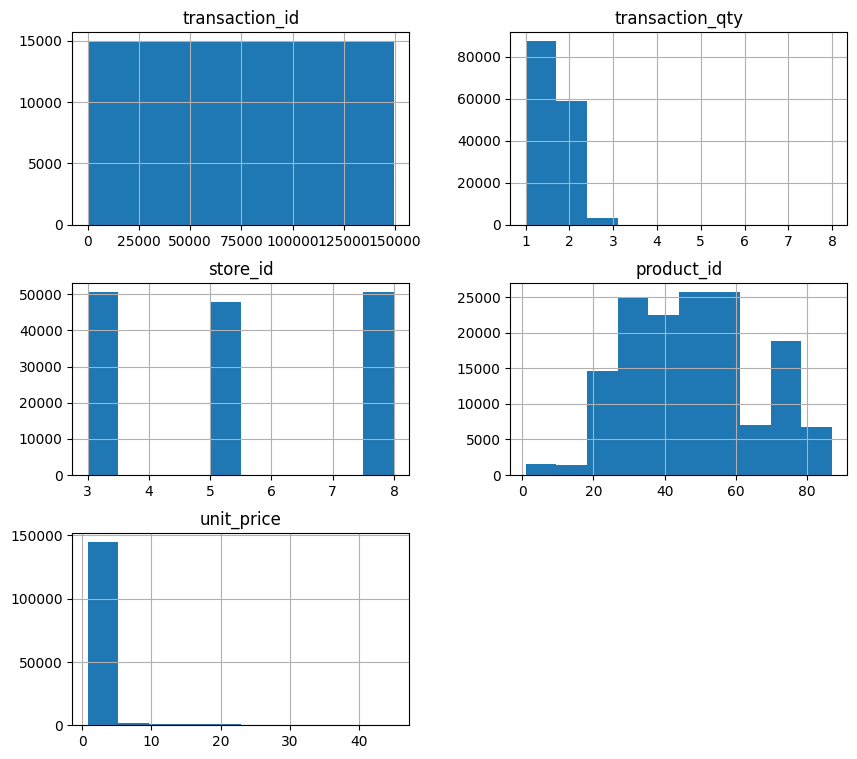

In [30]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
import matplotlib.pyplot as plT
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 3

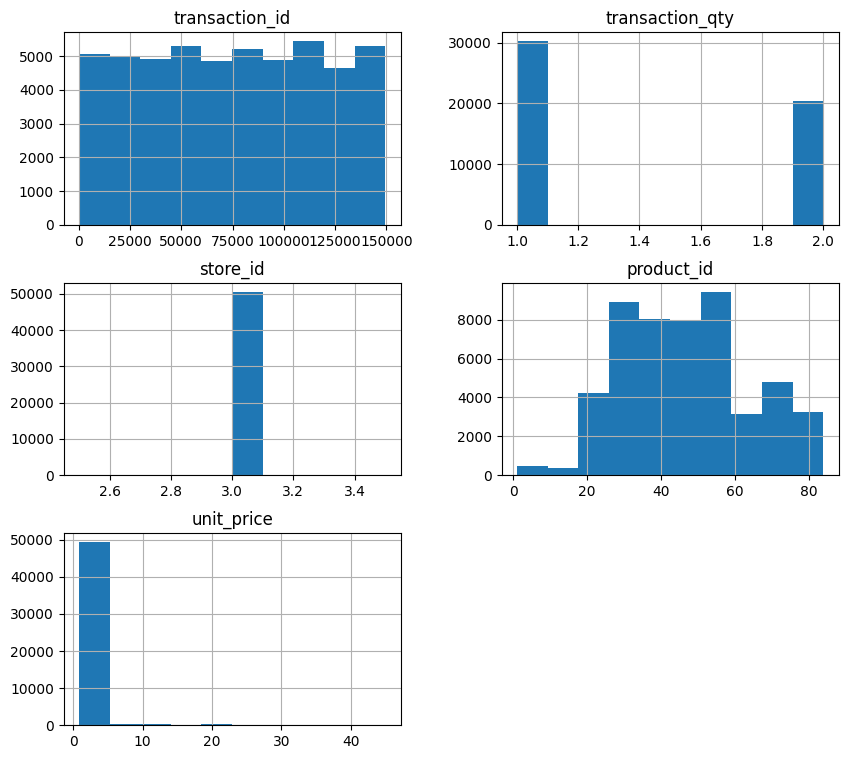

In [31]:

filtered_df_store_id_3 = df[df['store_id'] == 3]
nr = 10
filtered_df_store_id_3[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Histograme pentru store_id 5

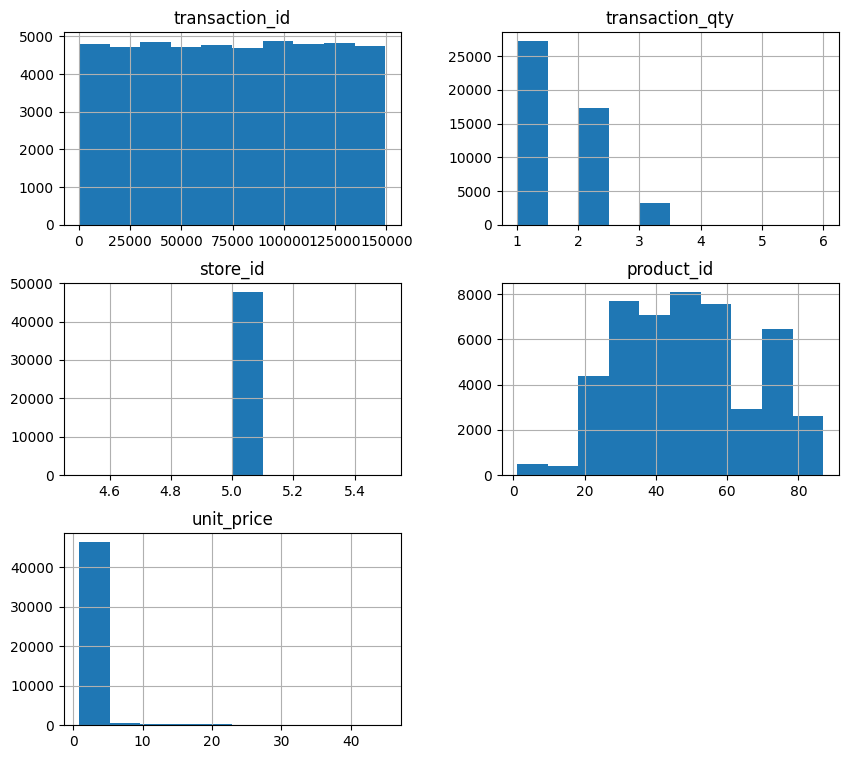

In [32]:
filtered_df_store_id_5 = df[df['store_id'] == 5]
nr = 10 
filtered_df_store_id_5[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 8

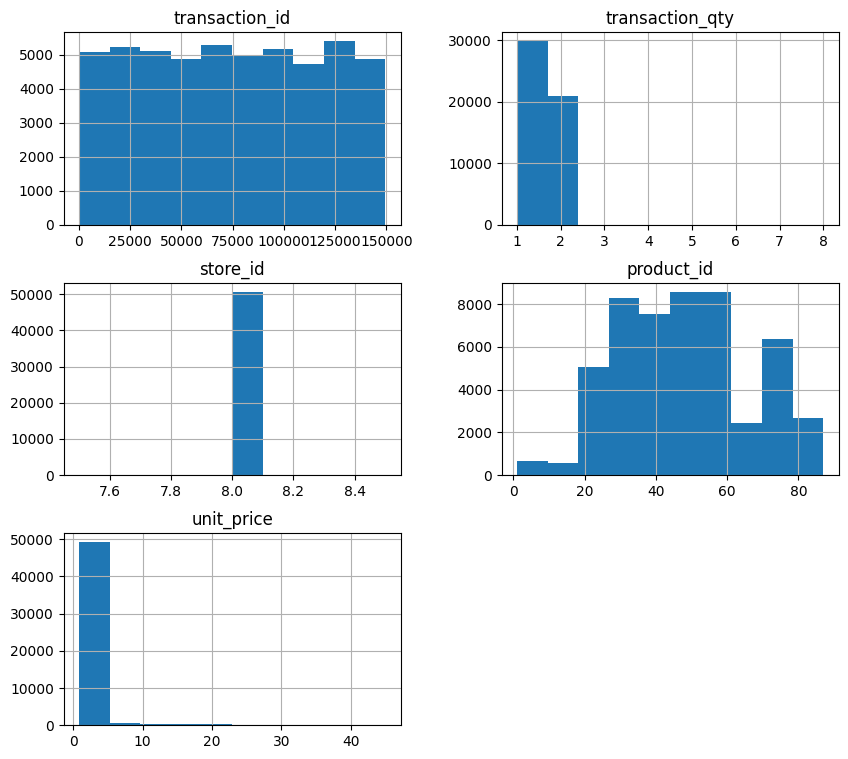

In [33]:
filtered_df_store_id_8= df[df['store_id'] == 8]
nr = 10  
filtered_df_store_id_8[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Matrice de corelatie

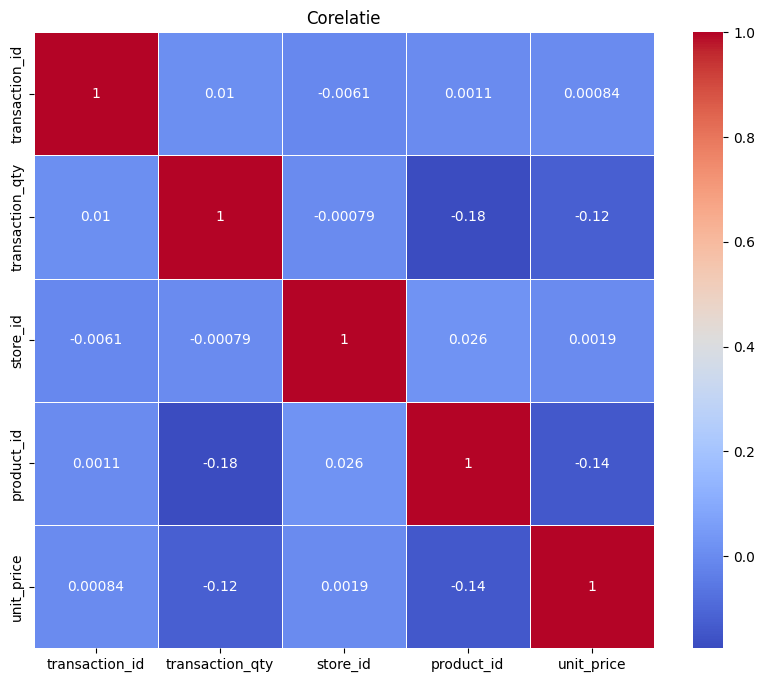

In [34]:


# Selectarea coloanelor numerice
numeric_df = df.select_dtypes(include=['number'])

# Calcularea matricei de corelatie
correlation_matrix = numeric_df.corr()


# print("Corelatie:")
# print(correlation_matrix)

plT.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plT.title('Corelatie')
plT.show()

### Gini index

In [ ]:
def lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  #Suma valori
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizare la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  
    return cumulative_values, gini

numeric_cols = df.select_dtypes(include=['number'])

# Crearea curbelor Lorenz si calcularea indicelui Gini pentru fiecare coloana numerica
for col in numeric_cols.columns:
    values = numeric_cols[col].dropna().values  #Eliminare valori lipsa
    cumulative_values, gini = lorenz_curve(values)
    

    plT.figure(figsize=(8, 6))
    plT.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label=f'Curba Lorenz ({col})')
    plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
    plT.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, np.linspace(0, 1, len(cumulative_values)), color='skyblue', alpha=0.4)
    plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
    plT.xlabel('Proporția populației')
    plT.ylabel('Proporția valorilor cumulative')
    plT.legend()
    plT.tight_layout()
    plT.show()

### Information Quantity

In [45]:
def entropy(column):
    probabilities = column.value_counts(normalize=True)
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calcularea entropiei pentru fiecare coloana
entropy_values = {}
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':  # Pentru coloane categorice
        entropy_values[col] = entropy(df[col])
    elif np.issubdtype(df[col].dtype, np.number):  # Pentru coloane numerice
        entropy_values[col] = entropy(pd.cut(df[col], bins=10))  # Grupam valorile numerice in intervale

# Afisare entropiei
print("Entropia (Information Quantity) pentru fiecare coloana:")
for col, entropy in entropy_values.items():
    print(f"{col}: {entropy:.4f}")

Entropia (Information Quantity) pentru fiecare coloana:
transaction_id: 3.3219
transaction_date: 7.4365
transaction_time: 14.3346
transaction_qty: 1.1066
store_id: 1.5844
store_location: 1.5844
product_id: 2.9661
unit_price: 0.2518
product_category: 2.1508
product_type: 3.9336
product_detail: 5.9359


#### Entropia pentru fiecare coloana

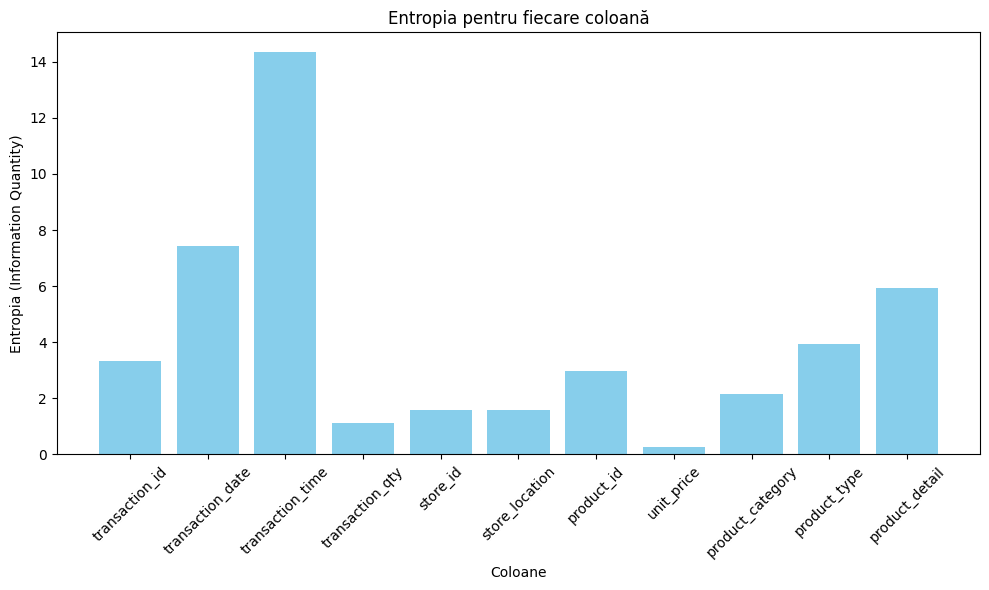

In [37]:
# Crearea graficului
plT.figure(figsize=(10, 6))
plT.bar(entropy_values.keys(), entropy_values.values(), color='skyblue')
plT.xlabel('Coloane')
plT.ylabel('Entropia (Information Quantity)')
plT.title('Entropia pentru fiecare coloană')
plT.xticks(rotation=45)
plT.tight_layout()
plT.show()

### Store_id 3 Gini Index

Gini Index și Curba Lorenz pentru store_id 3:
  transaction_id: 0.3328


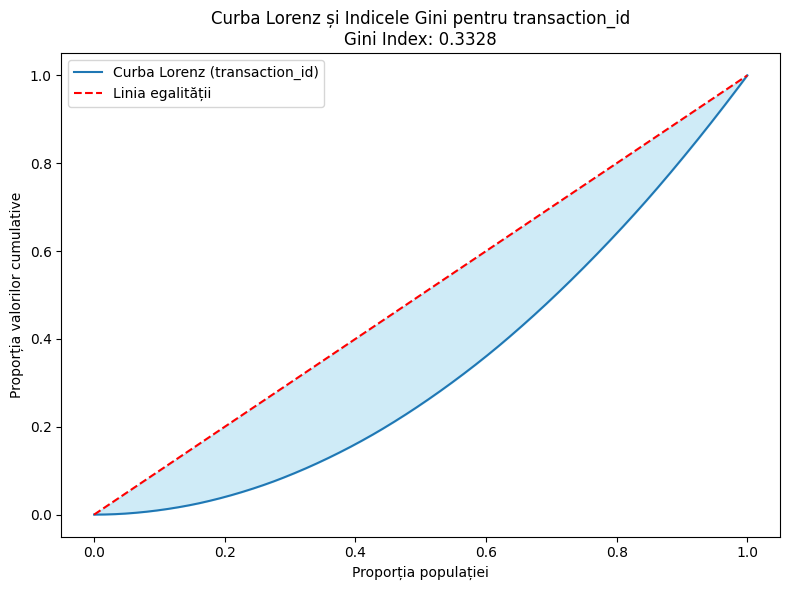

  transaction_qty: 0.1715


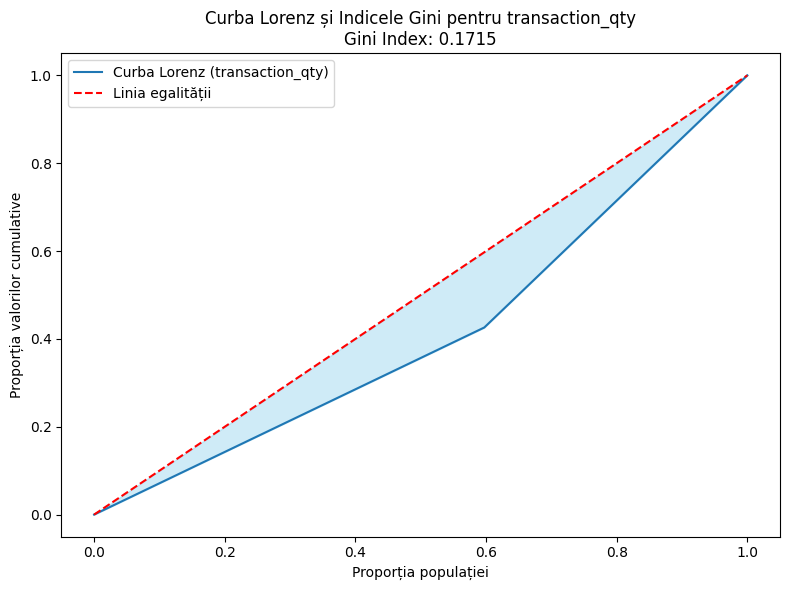

  product_id: 0.2068


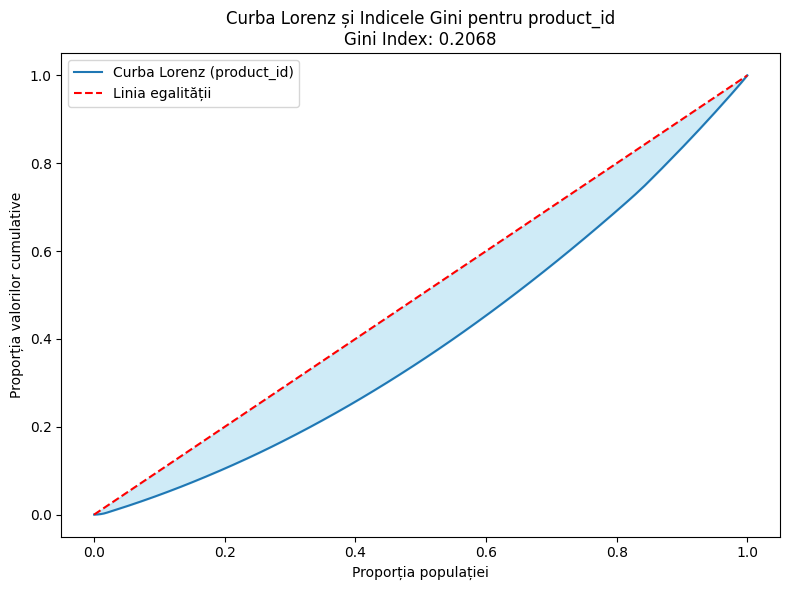

  unit_price: 0.2114


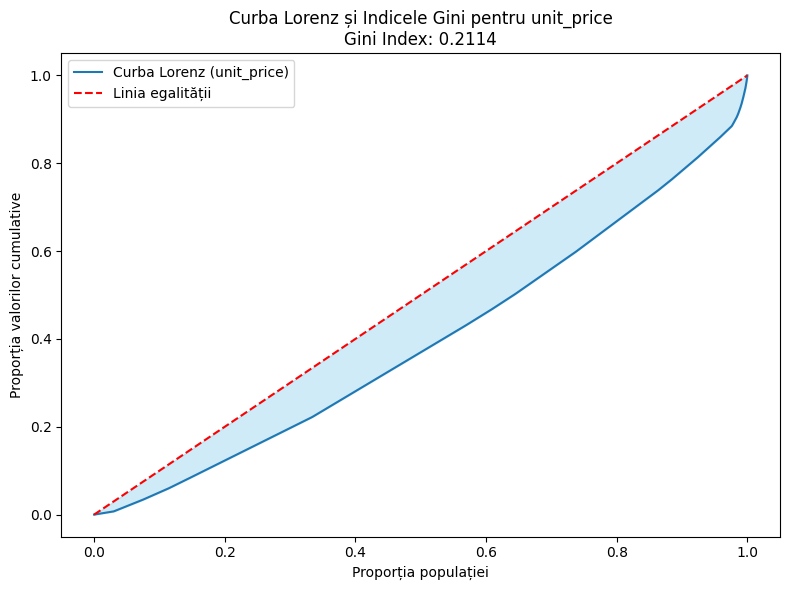

In [ ]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values


# Filtrarea datelor pentru store_id = 3
filtered_df_store_id_3 = df[df['store_id'] == 3]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_3.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 3:")
for col in numeric_cols.columns:
    if filtered_df_store_id_3[col].sum() > 0:  # Verificam dacă exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_3[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(8, 6))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 5 Gini Index

Gini Index și Curba Lorenz pentru store_id 5:
  transaction_id: 0.3331


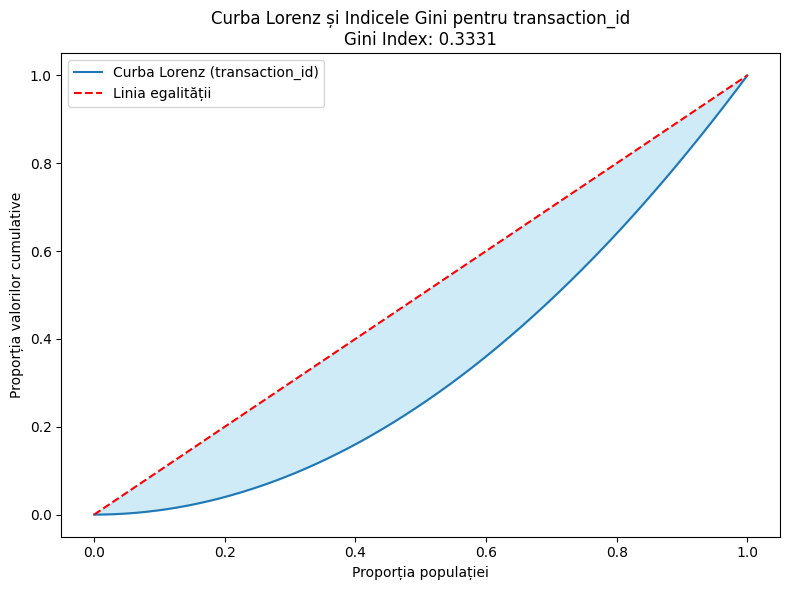

  transaction_qty: 0.2067


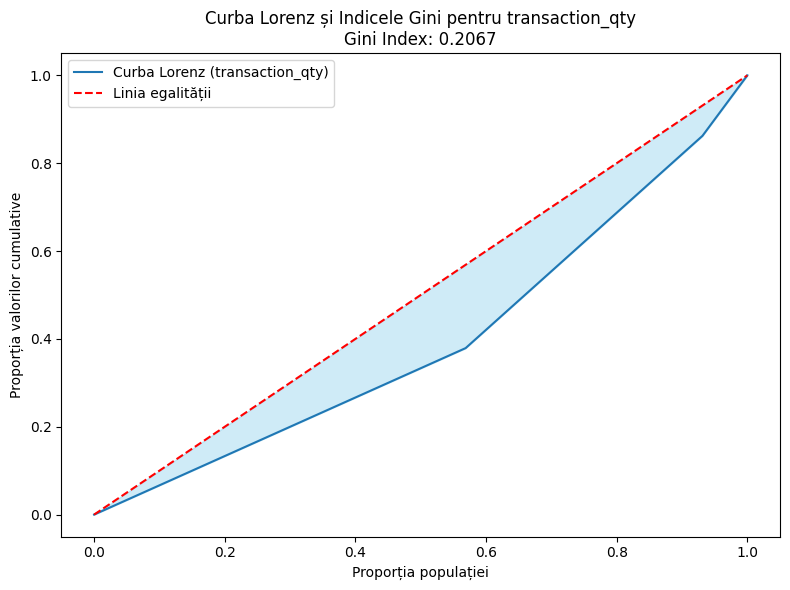

  product_id: 0.2140


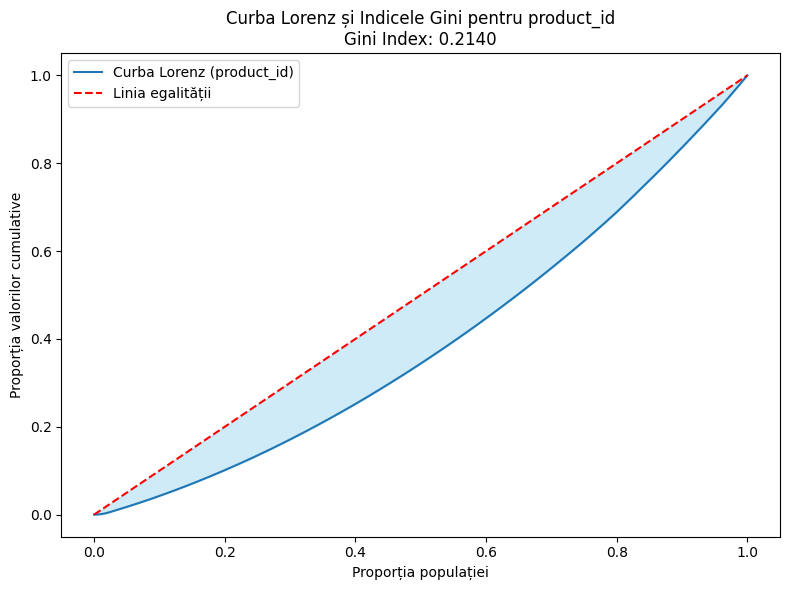

  unit_price: 0.2386


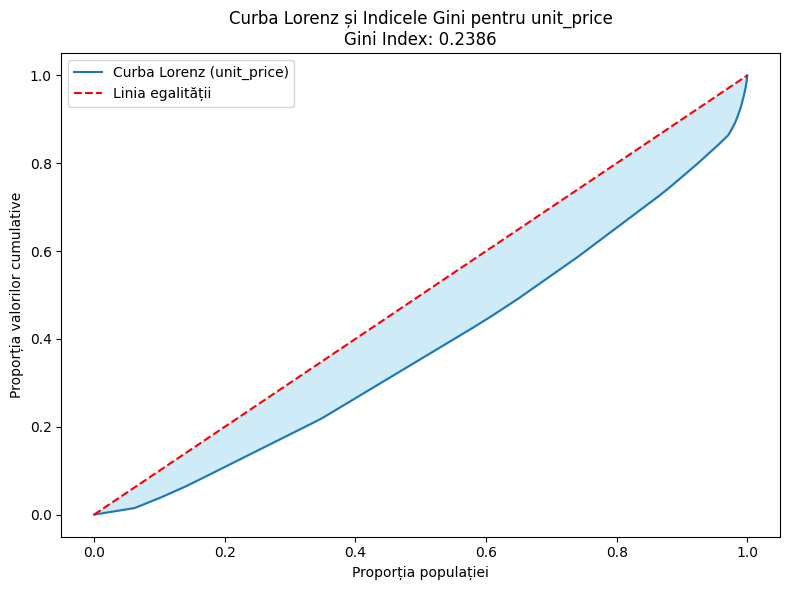

In [ ]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 5
filtered_df_store_id_5 = df[df['store_id'] == 5]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_5.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 5:")
for col in numeric_cols.columns:
    if filtered_df_store_id_5[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_5[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(8, 6))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 8 Gini Index

Gini Index și Curba Lorenz pentru store_id 8:
  transaction_id: 0.3341


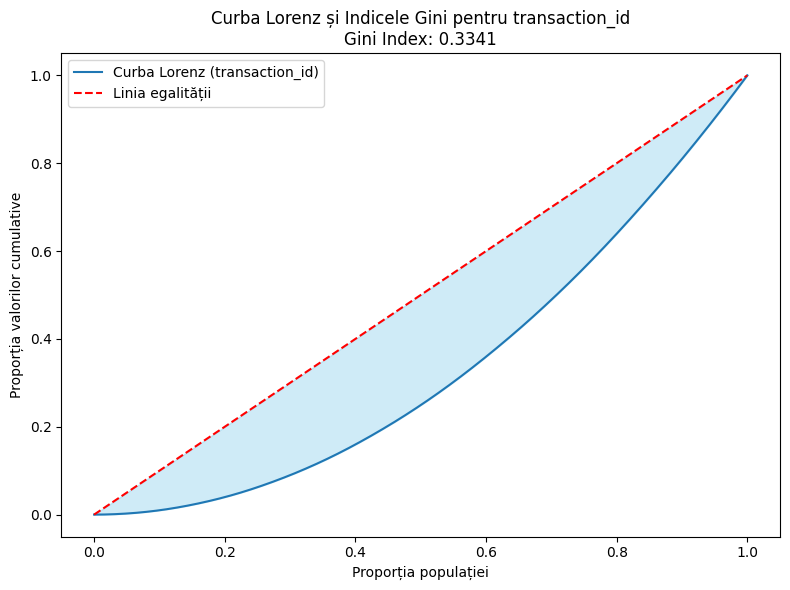

  transaction_qty: 0.1723


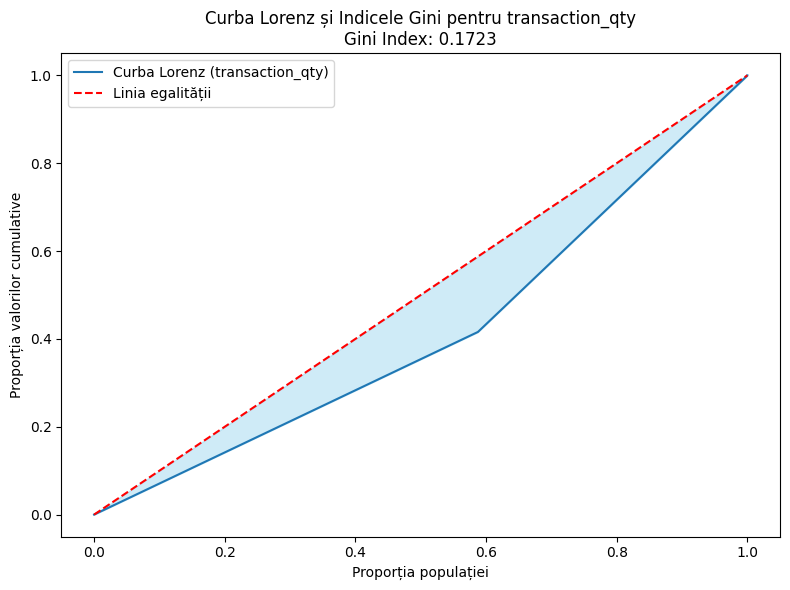

  product_id: 0.2187


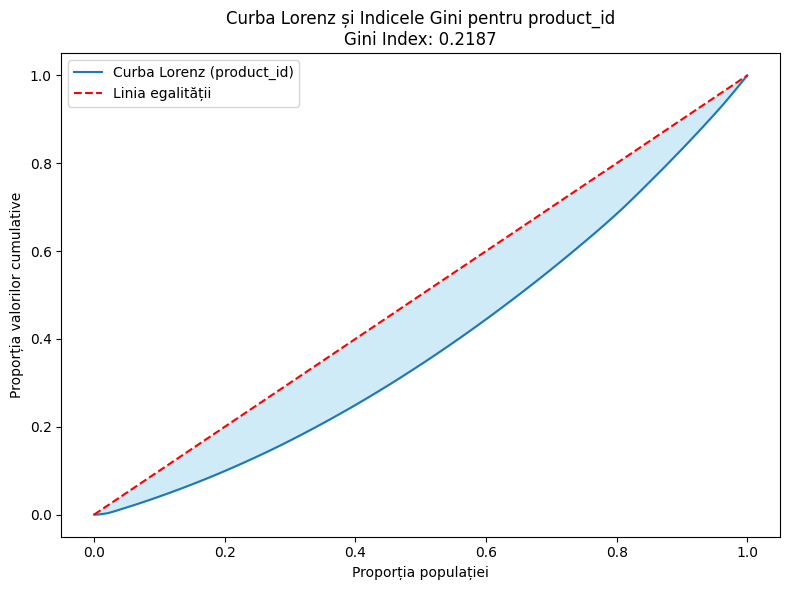

  unit_price: 0.2318


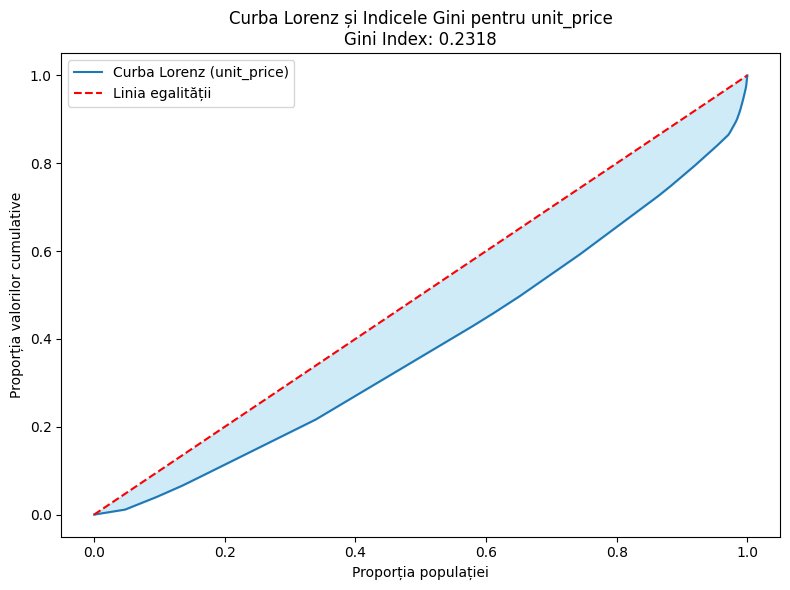

In [48]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 8
filtered_df_store_id_8 = df[df['store_id'] == 8]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_8.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 8:")
for col in numeric_cols.columns:
    if filtered_df_store_id_8[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_8[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(8, 6))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

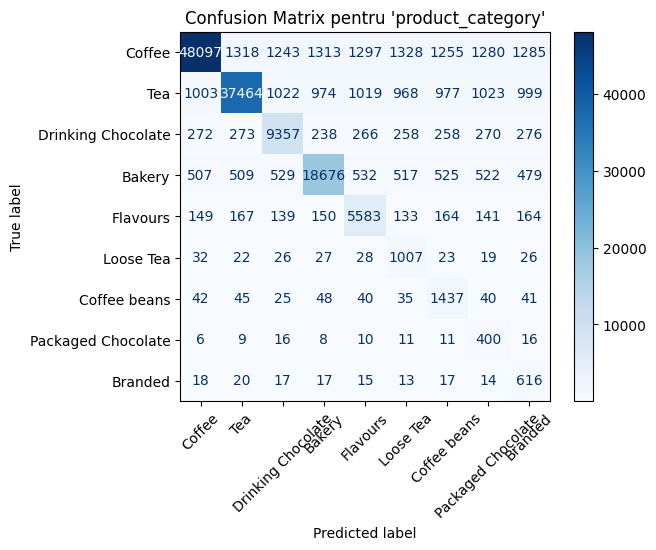

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true_labels = df['product_category']

# Simulam predictiile (pentru exemplu, vom introduce zgomot in etichetele reale)
np.random.seed(42)  # Pentru reproducibilitate
predicted_labels = true_labels.copy()
indices_to_modify = np.random.choice(len(true_labels), size=int(0.2 * len(true_labels)), replace=False)  # 20% zgomot
predicted_labels.iloc[indices_to_modify] = np.random.choice(true_labels.unique(), size=len(indices_to_modify))

# Calcularea confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=true_labels.unique())

# Afisare
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=true_labels.unique())
disp.plot(cmap='Blues', xticks_rotation=45)
plT.title("Confusion Matrix pentru 'product_category'")
plT.show()